In [1]:
# Dependencies
import gempy as gp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gempy.assets import topology as tp
import pickle

import warnings

warnings.filterwarnings("ignore")

# Creating model object and indicating path
data_path = "../../../../input/BES/stratbr/new_tests_v5/processed/"
geo_model = gp.create_model("StratBR2GemPy_v5")

No module named 'osgeo'


## Step by step

In [2]:
# Loading model, the extension, the resolution and importing the data
gp.init_data(
    geo_model,
    extent=[400000.0, 578000.0, 7651000.0, 7798000.0, -13000.0, 3500],
    resolution=[25, 25, 25],
    path_i=data_path + "sp_merged_top_89_100_reduced_2500.csv",
    path_o=data_path + "op_merged_top_89_100_2500.csv",
)

Active grids: ['regular']


StratBR2GemPy_v5  2024-03-15 00:20

In [3]:
gp.get_data(
    geo_model,
    "surfaces",
)

,surface,series,order_surfaces,color,id
0,top,Default series,1,#015482,1
1,bes_89.0,Default series,2,#9f0052,2
2,bes_100.0,Default series,3,#ffbe00,3
3,basement,Basement,1,#728f02,4


In [4]:
# Ordenando as surfaces (Estratigrafia (topo para base)) 1
gp.map_stack_to_surfaces(
    geo_model,
    {
        "Strat_top": (
            "top",
            "bes_89.0",
            "bes_100.0",
        ),
        "Basement": ("basement",),
    },
)

,surface,series,order_surfaces,color,id
0,top,Strat_top,1,#015482,1
1,bes_89.0,Strat_top,2,#9f0052,2
2,bes_100.0,Strat_top,3,#ffbe00,3
3,basement,Basement,1,#728f02,4


In [4]:
# Ordenando as surfaces (Estratigrafia (topo para base)) 1
gp.map_stack_to_surfaces(
    geo_model,
    {
        "Strat_1": (
            "top",
        ),
        "Strat_2": (
            "bes_89.0",
        ),
        "Strat_3": (
            "bes_100.0",
        ),
        "Basement": ("basement",),
    },
)

,surface,series,order_surfaces,color,id
0,top,Strat_1,1,#015482,1
1,bes_89.0,Strat_2,1,#9f0052,2
2,bes_100.0,Strat_3,1,#ffbe00,3
3,basement,Basement,1,#728f02,4


In [5]:
geo_model.get_data()

X          Y          Z    smooth    surface   
surface_points 0      400000.0  7651000.0    604.197  0.000002        top  \
               1      403000.0  7651000.0    680.618  0.000002        top   
               2      405000.0  7651000.0    744.976  0.000002        top   
               3      408000.0  7651000.0    833.480  0.000002        top   
               4      410000.0  7651000.0    860.515  0.000002        top   
...                        ...        ...        ...       ...        ...   
               12956  570000.0  7798000.0 -10541.130  0.000002  bes_100.0   
               12957  573000.0  7798000.0 -10557.440  0.000002  bes_100.0   
               12958  575000.0  7798000.0 -10565.100  0.000002  bes_100.0   
               12959  578000.0  7798000.0 -10572.170  0.000002  bes_100.0   
orientations   0      400000.0  7651000.0    604.200  0.010000        top   

                               G_x           G_y  G_z  
surface_points 0               NaN           NaN  NaN  
               1               NaN           NaN  NaN  
               2               NaN           NaN  NaN  
               3               NaN           NaN  NaN  
               4               NaN           NaN  NaN  
...                            ...           ...  ...  
               12956           NaN           NaN  NaN  
               12957           NaN           NaN  NaN  
               12958           NaN           NaN  NaN  
               12959           NaN           NaN  NaN  
orientations   0      1.000000e-12  1.000000e-12  1.0  

[12961 rows x 8 columns]

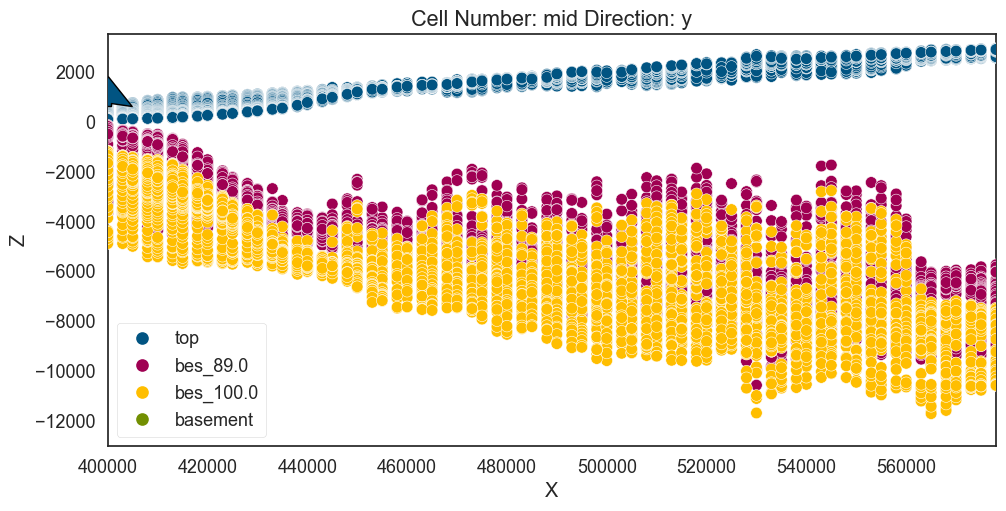

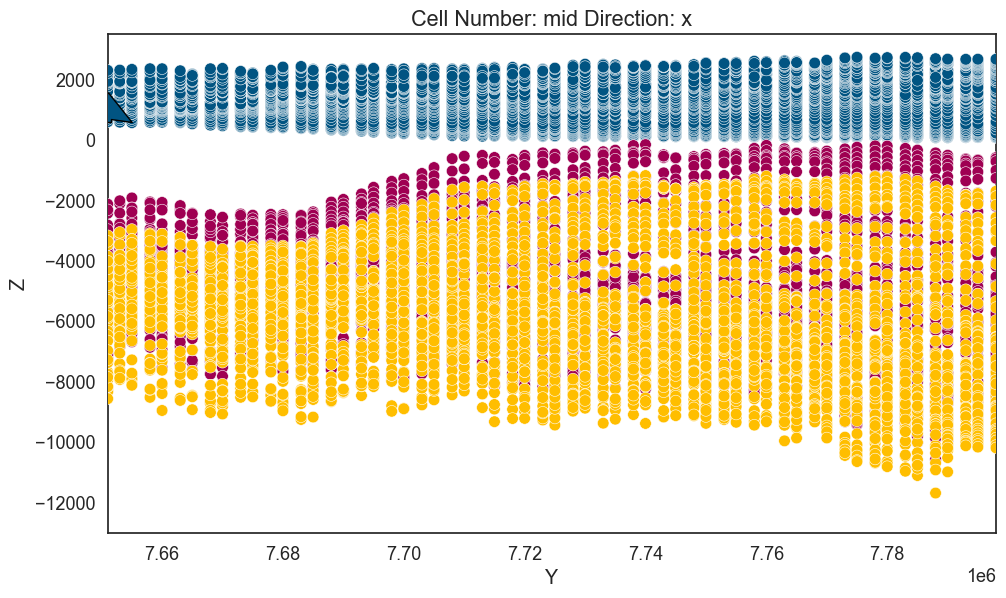

In [5]:
# Seção transversal do modelo
gp.plot_2d(geo_model, direction="y", show_data=True, show_lith=True, ve=5, legend=True)
gp.plot_2d(geo_model, direction="x", show_data=True, show_lith=True, ve=5, legend=False)
# gp.plot_2d(geo_model, direction="z", show_data=True, show_lith=True, ve=1, legend=False)

In [6]:
# Ver os dados em 3D
gpv = gp.plot_3d(
    geo_model,
    plotter_type="background",
    image=False,
    #show_data=True,
    #show_surfaces=True,
    #show_scalar=True,
    #show_boundaries=True,
    ve=2,
)

In [7]:
%%time
gp.set_interpolator(
    geo_model, 
    compile_theano=True, 
    theano_optimizer='fast_compile', # fast_compile, fast_run
    dtype="float64",  # for model stability
)

Setting kriging parameters to their default values.
Compiling aesara function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                             values
range                231441.677318
$C_o$            1275363095.238096
drift equations             [3, 3]
CPU times: total: 17.2 s
Wall time: 18.1 s


In [8]:
%%time
sol = gp.compute_model(
    geo_model, 
    compute_mesh=True,
    )

MemoryError: Unable to allocate 1.25 GiB for an array with shape (12957, 12957) and data type float64

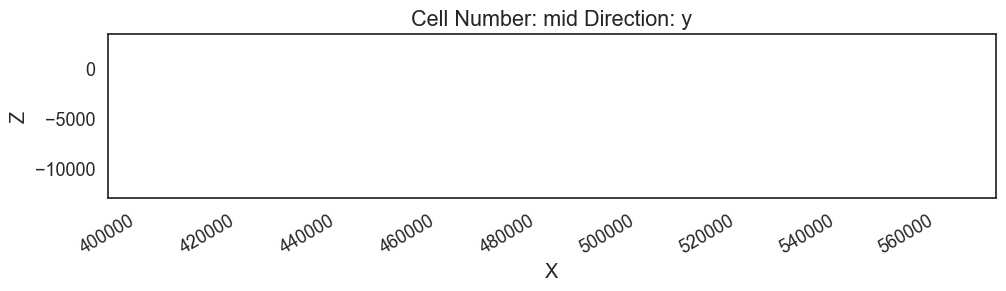

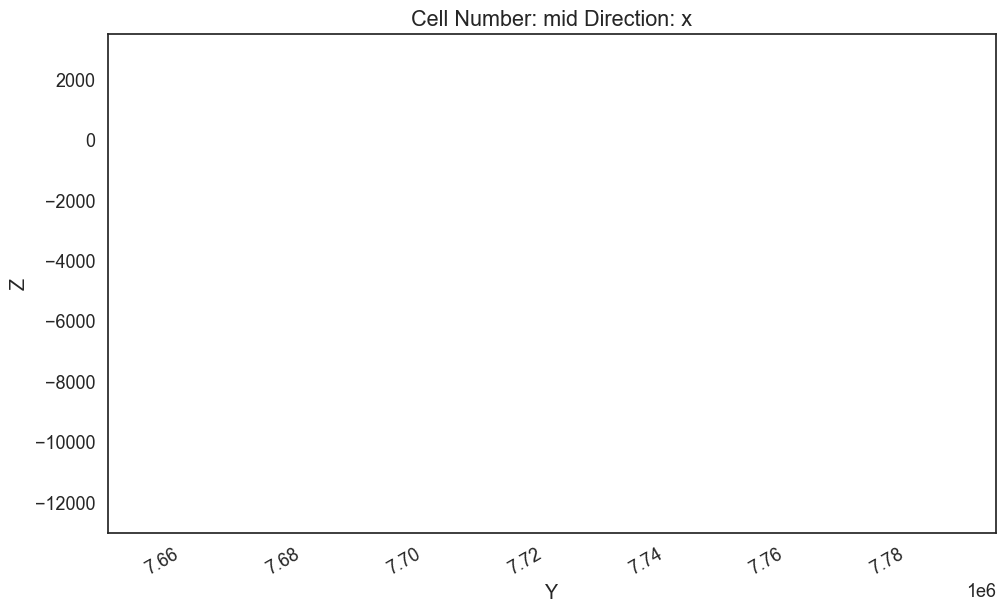

In [9]:
# Seção transversal do modelo
gp.plot_2d(geo_model, direction="y", show_data=False, show_lith=True, ve=2, legend=True)
gp.plot_2d(
    geo_model,
    direction="x",
    show_data=False,
    show_lith=True,
    ve=5,
    legend=True,
)

In [16]:
"""# Seção transversal do modelo
gp.plot_2d(geo_model, direction="y", show_data=True, show_lith=True, ve=2, legend=True)
gp.plot_2d(
    geo_model,
    direction="x",
    show_data=False,
    show_lith=True,
    ve=5,
    legend=True,
)"""

'# Seção transversal do modelo\ngp.plot_2d(geo_model, direction="y", show_data=True, show_lith=True, ve=2, legend=True)\ngp.plot_2d(\n    geo_model,\n    direction="x",\n    show_data=False,\n    show_lith=True,\n    ve=5,\n    legend=True,\n)'

In [10]:
# Ver os dados em 3D
gpv = gp.plot_3d(geo_model, image=False, plotter_type="background", show_data=False, ve=3)

In [ ]:
"""topo_init = tp.compute_topology(
    geo_model, direction="x", voxel_threshold=1
)  # , direction="Y", cell_number=15)
edges_init, centroids_init = tp.clean_unconformity_topology(
    geo_model, 1, topo_init[0], topo_init[1]
)"""

In [ ]:
"""# Seção transversal do modelo
gp.plot_2d(
    geo_model,
    direction="y",
    show_data=False,
    show_lith=False,
    ve=1,
)
gp.plot.plot_topology(geo_model, edges_init, centroids_init)"""

In [ ]:
# Save geo_model to a file
save_path_model = "../../../output/BES/StartBR/novos_testes/gempy_2.3.1/"
with open(save_path_model + 'geo_model.pkl', 'wb') as f:
    pickle.dump(geo_model, f)

In [ ]:
save_path_model = "../../../output/BES/StartBR/novos_testes/gempy_2.3.1/"
# Load geo_model from a file
with open(save_path_model + 'geo_model.pkl', 'rb') as f:
    geo_model = pickle.load(f)

In [ ]:
# Salvar o modelo gerado em zip (contem todos os files relevantes para refazer o modelo)
gp.save_model(
    geo_model,
    compress=True,
)

### GemGis 

- Removando as surfaces geradas no Gempy

In [ ]:
import gemgis as gg
import pyvista as pv
import pickle

def plot_all_sp(all_sp, z_scale=5, notebook=True, color_mode=1):
    '''
    Plot all_sp dictionary
    
    Arguments:
        all_sp: dictionary of polydata and color for each formation
        z_scale: vertical exaggeration factor, default is 5
        color_mode: mode for coloring the meshes, default is 1
            1: color each mesh with its own color
            2: color all meshes with the color of the first mesh
            3: color meshes based on the 'Depth [m]' scalar
    Returns:
        p: pyvista plotter with point clouds
    '''
    # Create the plotter
    p = pv.Plotter(notebook=notebook)

    # Get the color of the first mesh
    first_color = next(iter(all_sp.values()))[1]

    # Loop over the all_sp dictionary and add the meshes to the plotter
    for key, value in all_sp.items():
        mesh = value[0].copy()
        mesh.points[:, 2] *= z_scale

        # Determine the color of the mesh
        if color_mode == 1:
            p.add_mesh(mesh, color=value[1])
        elif color_mode == 2:
            p.add_mesh(mesh, color=first_color)
        elif color_mode == 3:
            p.add_mesh(mesh, scalars='Depth [m]')
        else:
            raise ValueError("Invalid color_mode")

    # Set the background color and show the grid
    p.set_background('white')
    p.show_grid(color='black')

    # Show the plot
    p.show()
    
    return p

In [ ]:
sfs = [
    'bes_89', 
    #'bes_90', 
    #'bes_91', 
    #'bes_92', 
    #'bes_93', 
    #'bes_94', 
    #'bes_95', 
    #'bes_96', 
    #'bes_97', 
    #'bes_98', 
    #'bes_99', 
    'bes_100',
    ]
all_sp = gg.visualization.create_depth_maps_from_gempy(geo_model=geo_model, surfaces=sfs)
plotter = plot_all_sp(all_sp, z_scale=5, color_mode=1)

In [ ]:
all_sp

In [ ]:
# Save all_sp to a file
save_path = '../../../input/BES/testing_new_strat_br_extraction/'
with open(save_path + 'all_sp.pkl', 'wb') as f:
    pickle.dump(all_sp, f)

In [ ]:
# Load all_sp from a file
with open('../../../input/BES/testing_new_strat_br_extraction/all_sp.pkl', 'rb') as f:
    testing = pickle.load(f)
plotter = plot_all_sp(testing, z_scale=5, color_mode=3)

### Surfaces to netcdf test 1

- A partir das surfaces do Gempy retirada pelo GemGis, transformar em netcdf

In [ ]:
import numpy as np
import pyvista as pv
import xarray as xr
import gemgis as gg

def create_datasets(sfs, all_sp):
    '''
    Create a dictionary of xarray datasets, one for each formation
    
    Arguments:
        sfs: list of formations
        all_sp: dictionary of polydata and color for each formation
    Returns:
        datasets: dictionary of xarray datasets for each formation
    '''
    datasets = {}
    for formation in sfs:
        polydata, color = all_sp[formation]
        x, y, z = np.array(polydata.points.T)
        ds = xr.Dataset(
            {
                "X": ("point", x),
                "Y": ("point", y),
                "Z": ("point", z),
            },
            coords={
                "point": np.arange(len(x)),
            },
            attrs={
                "n_cells": polydata.GetNumberOfCells(),
                "color": color,
            },
        )
        datasets[formation] = ds
    return datasets

def plot_datasets(datasets, ve=1, notebook=False, color_mode=1):
    '''
    Plot xarray datasets
    
    Arguments:
        datasets: dictionary of xarray datasets for each formation
        ve: vertical exaggeration factor, default is 1
        color_mode: mode for coloring the meshes, default is 1
            1: color each mesh with its own color
            2: color all meshes with the color of the first mesh
            3: color meshes based on the Z coordinate
    Returns:
        p: pyvista plotter with point clouds
    '''
    # Create the plotter
    p = pv.Plotter(notebook=notebook)

    # Get the color of the first mesh
    first_color = next(iter(datasets.values())).attrs["color"]

    # Loop over the datasets and add the meshes to the plotter
    for formation, ds in datasets.items():
        points = np.column_stack([ds["X"].values, ds["Y"].values, ds["Z"].values * ve])
        mesh = pv.PolyData(points)
        mesh = mesh.delaunay_2d()

        # Determine the color of the mesh
        if color_mode == 1:
            p.add_mesh(mesh, color=ds.attrs["color"])
        elif color_mode == 2:
            p.add_mesh(mesh, color=first_color)
        elif color_mode == 3:
            p.add_mesh(mesh, scalars=ds["Z"].values * ve)
        else:
            raise ValueError("Invalid color_mode")

    # Set the background color and show the grid
    p.set_background('white')
    p.show_grid(color='black')

    # Show the plot
    p.show()
    
    return p

In [ ]:
sfs = [
    'bes_89', 
    #'bes_90', 
    #'bes_91', 
    #'bes_92', 
    #'bes_93', 
    #'bes_94', 
    #'bes_95', 
    #'bes_96', 
    #'bes_97', 
    #'bes_98', 
    #'bes_99', 
    'bes_100',
    ]
all_sp = gg.visualization.create_depth_maps_from_gempy(geo_model=geo_model, surfaces=sfs)
datasets = create_datasets(sfs, all_sp)
#print(datasets)
plotter = plot_datasets(datasets, ve=5, color_mode=1, notebook=True)

In [ ]:
datasets

In [ ]:
datasets["bes_89"]

### Surfaces to netcdf test 2

- A partir das surfaces do Gempy retirada pelo GemGis, transformar em netcdf

In [ ]:
import pyvistaqt as pvqt
import PVGeo

def plot_block_model(field):
    '''
    Function for plotting 3D Block Model based on GStools result
    
    Arguments:
        field: GSTools Spatial Random Field object (3D)
    Returns:
        p: pyvista plotter with voxel model
    '''
    
    # Create pyvista mesh for field
    pc = field.to_pyvista()
    
    # Find voxel size
    spacing = lambda arr: np.unique(np.diff(np.unique(arr)))
    voxelsize = spacing(pc.points[:,0]), spacing(pc.points[:,1]), spacing(pc.points[:,2])

    # Pvgeo way of voxelizing semi-unstructured grid
    grid = PVGeo.filters.VoxelizePoints(dx=voxelsize[0][0], dy=voxelsize[1][0], dz=voxelsize[2][0], estimate=False).apply(pc)

    # Plotting
    #p = pv.Plotter(notebook=True)
    p = pvqt.BackgroundPlotter()
    #p.add_mesh(grid, opacity=1, show_edges=True)
    cmap = plt.cm.get_cmap("viridis", 5)
    #p.add_mesh(grid, opacity=1, show_edges=False, lighting=False, cmap=cmap)
    p.add_mesh(grid, opacity=1, show_edges=False, lighting=False, cmap="viridis") # continuous cmap
    #p.add_mesh(pc, point_size=5, cmap='viridis')
    
    return p

def extract_domain(sol, unit, sf_colors):
    '''
    Extract domain coordinates from gempy model by unit name
    
    Arguments:
        sol: Gempy solution object.
        unit: string name of gempy surface
        sf_colors: Gempy Surfaces object
    Returns:
        dom_x, dom_y, dom_z, color: coordinates of domain and color of surface
    '''

    # Round Lithlogy block from gempy
    rounded_lithblock = sol.lith_block.round(0)
    rounded_lithblock = rounded_lithblock.astype(int)

    # Mask by array of input surfaces (by id, can be from different series)
    mask = np.isin(rounded_lithblock, [ref_dict[unit]])

    # Get coordinates by mask
    dom_grid = sol.grid.values[mask]

    # Split coordiantes
    dom_x = dom_grid[:,0]
    dom_y = dom_grid[:,1]
    dom_z = dom_grid[:,2]

    # Get color of the surface
    color = sf_colors.df.loc[sf_colors.df['surface'] == unit, 'color'].values[0]

    return dom_x, dom_y, dom_z, color

In [ ]:
ref_dict = dict(geo_model.surfaces.df[['surface', 'id']].values)
print(ref_dict)
ref_dict2 = {
    "TOP": "TOP",
    "bes_89": "bes_89",
    "bes_90": "bes_90",
    "bes_91": "bes_91",
    "bes_92": "bes_92",
    "bes_93": "bes_93",
    "bes_94": "bes_94",
    "bes_95": "bes_95",
    "bes_96": "bes_96",
    "bes_97": "bes_97",
    "bes_98": "bes_98",
    "bes_99": "bes_99",
    "bes_100": "bes_100",
    }

In [ ]:
sf_color = gp.get_data(
    geo_model,
    "surfaces",
)
sf_color

In [ ]:
# Extract domain from gempy model
domain_x, domain_y, domain_z, color = extract_domain(sol, ref_dict2["bes_89"], sf_color)
print(domain_x, domain_y, domain_z, color)

In [ ]:
def plot_domain(domain_x, domain_y, domain_z, color, ve=1):
    '''
    Function for plotting 3D domain extracted from Gempy model
    
    Arguments:
        domain_x, domain_y, domain_z: arrays of domain coordinates
        color: color for the point cloud
    Returns:
        p: pyvista plotter with point cloud
    '''
    
    domain_z = domain_z * ve
    
    # Create a numpy array of the domain coordinates
    points = np.column_stack([domain_x, domain_y, domain_z])
    
    # Create a PyVista point cloud from the domain coordinates
    cloud = pv.PolyData(points)
    
    # Perform Delaunay 2D triangulation to create a mesh
    mesh = cloud.delaunay_2d()
    
    # Create a PyVista plotter
    p = pv.Plotter(notebook=True)
    #p = pvqt.BackgroundPlotter()
    
    # Add the point cloud to the plotter
    p.add_mesh(mesh, color=color)
    
    return p

In [ ]:
# Extract domain from gempy model
domain_x, domain_y, domain_z, color = extract_domain(sol, ref_dict2["bes_89"], sf_color)

# Plot the domain
plotter = plot_domain(domain_x, domain_y, domain_z, color, ve=5)
plotter.show()

In [ ]:
# Várias unidades
def extract_domains(sol, units, sf_colors):
    '''
    Extract domain coordinates from gempy model by unit name
    
    Arguments:
        sol: Gempy solution object.
        units: list of string names of gempy surfaces
        sf_colors: Gempy Surfaces object
    Returns:
        domains, colors: list of coordinates of domains and list of colors of surfaces
    '''
    domains = []
    colors = []
    
    for unit in units:
        # Round Lithlogy block from gempy
        rounded_lithblock = sol.lith_block.round(0)
        rounded_lithblock = rounded_lithblock.astype(int)

        # Mask by array of input surfaces (by id, can be from different series)
        mask = np.isin(rounded_lithblock, [ref_dict[unit]])

        # Get coordinates by mask
        dom_grid = sol.grid.values[mask]

        # Split coordiantes
        dom_x = dom_grid[:,0]
        dom_y = dom_grid[:,1]
        dom_z = dom_grid[:,2]

        # Get color of the surface
        color = sf_colors.df.loc[sf_colors.df['surface'] == unit, 'color'].values[0]

        domains.append((dom_x, dom_y, dom_z))
        colors.append(color)
    
    return domains, colors

def plot_domains(domains, colors, ve=1):
    '''
    Function for plotting 3D domains extracted from Gempy model
    
    Arguments:
        domains: list of tuples of domain coordinates
        colors: list of colors for the point clouds
    Returns:
        p: pyvista plotter with point clouds
    '''
    # Create a PyVista plotter
    p = pv.Plotter(notebook=True)
    
    for (domain_x, domain_y, domain_z), color in zip(domains, colors):
        domain_z = domain_z * ve

        # Create a numpy array of the domain coordinates
        points = np.column_stack([domain_x, domain_y, domain_z])

        # Create a PyVista point cloud from the domain coordinates
        cloud = pv.PolyData(points)

        # Perform Delaunay 2D triangulation to create a mesh
        mesh = cloud.delaunay_2d()

        # Add the point cloud to the plotter
        p.add_mesh(mesh, color=color)
    
    return p

ref_dict2 = {
    #"TOP": "TOP",
    "bes_89": "bes_89",
    #"bes_90": "bes_90",
    #"bes_91": "bes_91",
    #"bes_92": "bes_92",
    #"bes_93": "bes_93",
    #"bes_94": "bes_94",
    #"bes_95": "bes_95",
    #"bes_96": "bes_96",
    #"bes_97": "bes_97",
    #"bes_98": "bes_98",
    #"bes_99": "bes_99",
    "bes_100": "bes_100",
    }

ref_sufs = list(ref_dict2.values())

# Extract domains from gempy model
domains, colors = extract_domains(sol, ref_sufs, sf_color)

# Plot the domains
plotter = plot_domains(domains, colors, ve=5)
plotter.show()

In [ ]:
# Várias unidades
def extract_domains(sol, units, sf_colors):
    '''
    Extract domain coordinates from gempy model by unit name
    
    Arguments:
        sol: Gempy solution object.
        units: list of string names of gempy surfaces
        sf_colors: Gempy Surfaces object
    Returns:
        domains, colors: list of coordinates of domains and list of colors of surfaces
    '''
    domains = []
    colors = []
    
    for unit in units:
        # Round Lithlogy block from gempy
        rounded_lithblock = sol.lith_block.round(0)
        rounded_lithblock = rounded_lithblock.astype(int)

        # Mask by array of input surfaces (by id, can be from different series)
        mask = np.isin(rounded_lithblock, [ref_dict[unit]])

        # Get coordinates by mask
        dom_grid = sol.grid.values[mask]

        # Split coordiantes
        dom_x = dom_grid[:,0]
        dom_y = dom_grid[:,1]
        dom_z = dom_grid[:,2]

        # Get color of the surface
        color = sf_colors.df.loc[sf_colors.df['surface'] == unit, 'color'].values[0]

        domains.append((dom_x, dom_y, dom_z))
        colors.append(color)
    
    return domains, colors

def plot_domains(domains, colors, ve=1):
    '''
    Function for plotting 3D domains extracted from Gempy model
    
    Arguments:
        domains: list of tuples of domain coordinates
        colors: list of colors for the point clouds
    Returns:
        p: pyvista plotter with point clouds
    '''
    # Create a PyVista plotter
    p = pv.Plotter(notebook=True)
    
    for (domain_x, domain_y, domain_z), color in zip(domains, colors):
        domain_z = domain_z * ve

        # Create a numpy array of the domain coordinates
        points = np.column_stack([domain_x, domain_y, domain_z])

        # Create a PyVista from the domain coordinates
        mesh = pv.PolyData(points)

        # Perform Delaunay 2D triangulation to create a mesh
        mesh = mesh.delaunay_2d()

        # Add the point cloud to the plotter
        p.add_mesh(mesh, color=color)
    
    return p

ref_dict2 = {
    #"TOP": "TOP",
    "bes_89": "bes_89",
    #"bes_90": "bes_90",
    #"bes_91": "bes_91",
    #"bes_92": "bes_92",
    #"bes_93": "bes_93",
    #"bes_94": "bes_94",
    #"bes_95": "bes_95",
    #"bes_96": "bes_96",
    #"bes_97": "bes_97",
    #"bes_98": "bes_98",
    #"bes_99": "bes_99",
    "bes_100": "bes_100",
    }

ref_sufs = list(ref_dict2.values())

# Extract domains from gempy model
domains, colors = extract_domains(sol, ref_sufs, sf_color)

# Plot the domains
plotter = plot_domains(domains, colors, ve=5)
plotter.show()

## Grid creation teste 1

In [ ]:
import pandas as pd
import numpy as np
import xarray as xr
from vtk.util.numpy_support import vtk_to_numpy